In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [3]:
df_sm = pd.read_csv('resnet101_score_margin1.csv', index_col=0)
df_th = pd.read_csv('resnet101_confidence1.csv', index_col=0)

#exit0 = df_sm.loc[(df_sm['exit']==0) & (df_sm['exited']==1) & (df_sm['correct']==1) & (df_sm['threshold']==0.5)]
#exit0
df_sm.loc[(df_sm['exit']==0)]

co_res = pd.read_csv('resnet_conv_inference_test.csv', index_col=0)

In [4]:
th_num_exited_at_exit = []
th_exit_acc = []
th_exit_acc_if_exited = []
th_false_if_exited = []
th_time = []
th_exit_hist_correct = []
th_exit_hist_false = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_time = []
    exit_hist_correct = []
    exit_hist_false = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1)])
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==1)])/n_exited)
        exit_n_false.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['exited']==1) & (df_th['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct']==1)])/5000)
        exit_hist_correct.append((len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct'] == 1) & (df_th['exited']==1)])))
        exit_hist_false.append((len(df_th.loc[(df_th['threshold'] == t) & (df_th['exit'] == exit) & (df_th['correct'] == 0) & (df_th['exited']==1)])))
    th_num_exited_at_exit.append(exit_n_frac)
    th_exit_acc.append(exit_n_acc)
    th_false_if_exited.append(exit_n_false)
    th_exit_acc_if_exited.append(exit_n_acc_exited)
    th_time.append(exit_time)
    th_exit_hist_correct.append(exit_hist_correct)
    th_exit_hist_false.append(exit_hist_false)
    tmp = df_th.loc[(df_th['exit'] == exit)]
    exit_time.append(tmp['time'])
    #print(exit_n_acc)
    
sm_num_exited_at_exit = []
sm_exit_acc = []
sm_exit_acc_if_exited = []
sm_false_if_exited = []
sm_time = []
sm_exit_hist_correct = []
sm_exit_hist_false = []

for exit in range(0,4):
    exit_n_frac = []
    exit_n_acc_exited = []
    exit_n_false = []
    exit_n_acc = []
    exit_hist_correct = []
    exit_hist_false = []
    exit_time = []
    for t in np.arange(0.1, 1, 0.1):
        n_exited = len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1)])
        
        exit_n_frac.append(n_exited)
        exit_n_acc_exited.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==1)])/n_exited)
        exit_n_false.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['exited']==1) & (df_sm['correct']==0)])/n_exited)
        exit_n_acc.append(len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct']==1)])/5000)
        tmp = df_sm.loc[(df_sm['threshold']== t) & (df_sm['exit'] == exit)]
        exit_time.append(tmp['time'])
        
        exit_hist_correct.append((len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct'] == 1) & (df_sm['exited']==1)])))
        exit_hist_false.append((len(df_sm.loc[(df_sm['threshold'] == t) & (df_sm['exit'] == exit) & (df_sm['correct'] == 0) & (df_sm['exited']==1)])))
        #print(exit_n_acc)
    sm_num_exited_at_exit.append(exit_n_frac)
    sm_exit_acc.append(exit_n_acc)
    sm_false_if_exited.append(exit_n_false)
    sm_exit_acc_if_exited.append(exit_n_acc_exited)
    sm_time.append(exit_time)
    sm_exit_hist_correct.append(exit_hist_correct)
    sm_exit_hist_false.append(exit_hist_false)

In [71]:
x = np.arange(0.1, 1, 0.1)

## exit accuracy

0.489 0.703 0.883 0.893
0.489 0.703 0.883 0.893


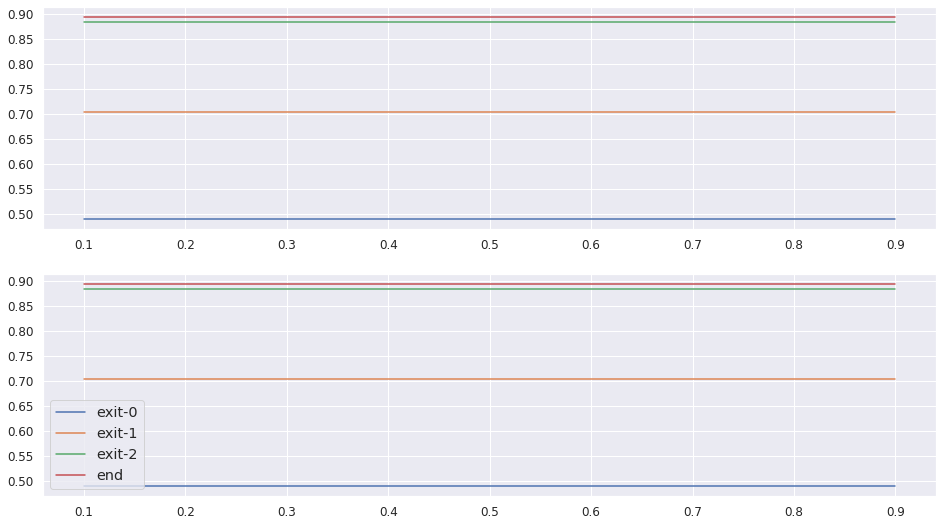

In [72]:
print(th_exit_acc[0][0], th_exit_acc[1][0], th_exit_acc[2][0], th_exit_acc[3][0])
print(sm_exit_acc[0][0], sm_exit_acc[1][0], sm_exit_acc[2][0], sm_exit_acc[3][0])

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_exit_acc:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_exit_acc:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## number of exited by threshold

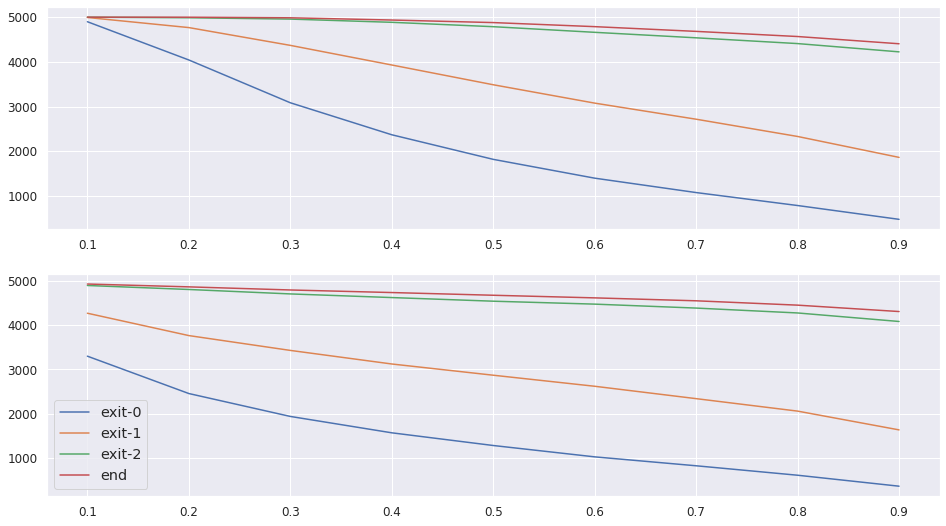

In [73]:

fig, axes = plt.subplots(2, figsize=(16,9))

for data in th_num_exited_at_exit:
    axes[0].plot(x, data)
    #plt.xticks()

for data in sm_num_exited_at_exit:
    axes[1].plot(x, data)
    #plt.xticks()
plt.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## falsely exited

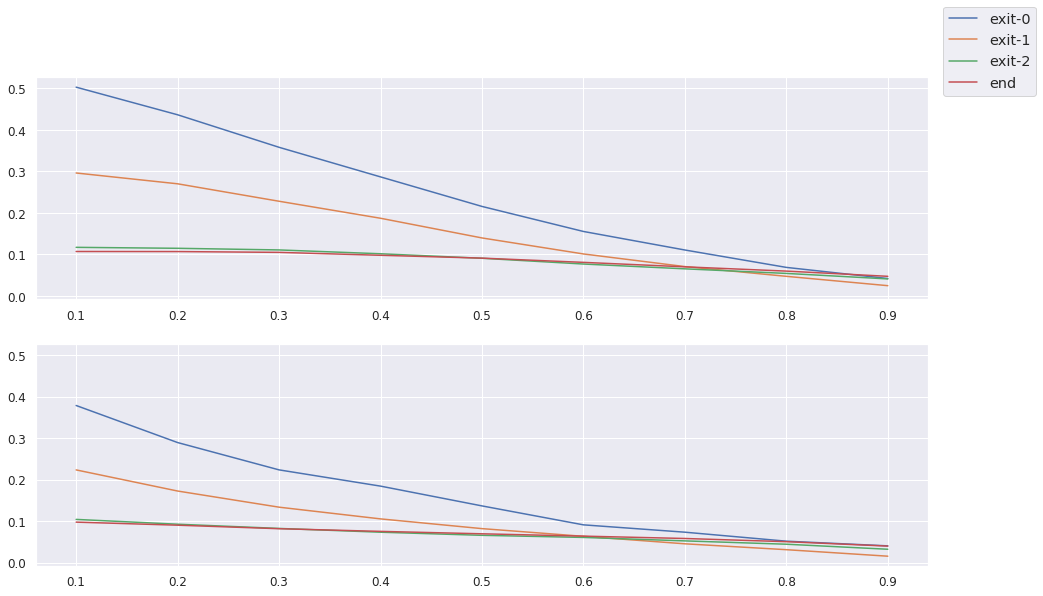

In [74]:

fig, axes = plt.subplots(2, sharey=True)

for data in th_false_if_exited:
    axes[0].plot(x, data)

for data in sm_false_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'])
plt.show()

## accuracy only if exited

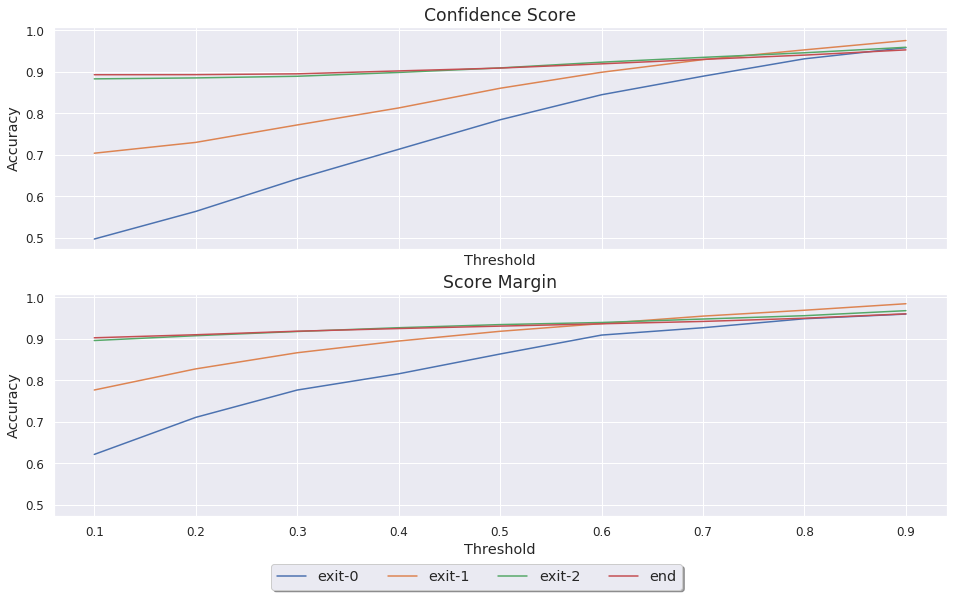

In [75]:

fig, axes = plt.subplots(2, sharey=True, sharex=True)


for data in th_exit_acc_if_exited:
    axes[0].plot(x, data)
axes[0].set_title('Confidence Score')

for data in sm_exit_acc_if_exited:
    axes[1].plot(x, data)
    #plt.xticks()
axes[1].set_title('Score Margin')
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'], loc='lower center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=4)

for ax in axes.flat:
    ax.set(xlabel='Threshold', ylabel='Accuracy')
plt.show()

In [9]:
co_res

,threshold,exit,prediction,target,correct,score_margin,time
0,0.5,conventional inference,0,0,True,0.999941,1.029331
1,0.5,conventional inference,0,0,True,0.999995,0.044082
2,0.5,conventional inference,0,0,True,0.999996,0.045101
3,0.5,conventional inference,0,0,True,0.998290,0.050648
4,0.5,conventional inference,0,0,True,0.999997,0.046174
5,0.5,conventional inference,0,0,True,0.997812,0.045043
6,0.5,conventional inference,0,0,True,0.999975,0.045619
7,0.5,conventional inference,0,0,True,0.999998,0.045639
8,0.5,conventional inference,0,0,True,0.999949,0.045213
9,0.5,conventional inference,0,0,True,0.999201,0.045018


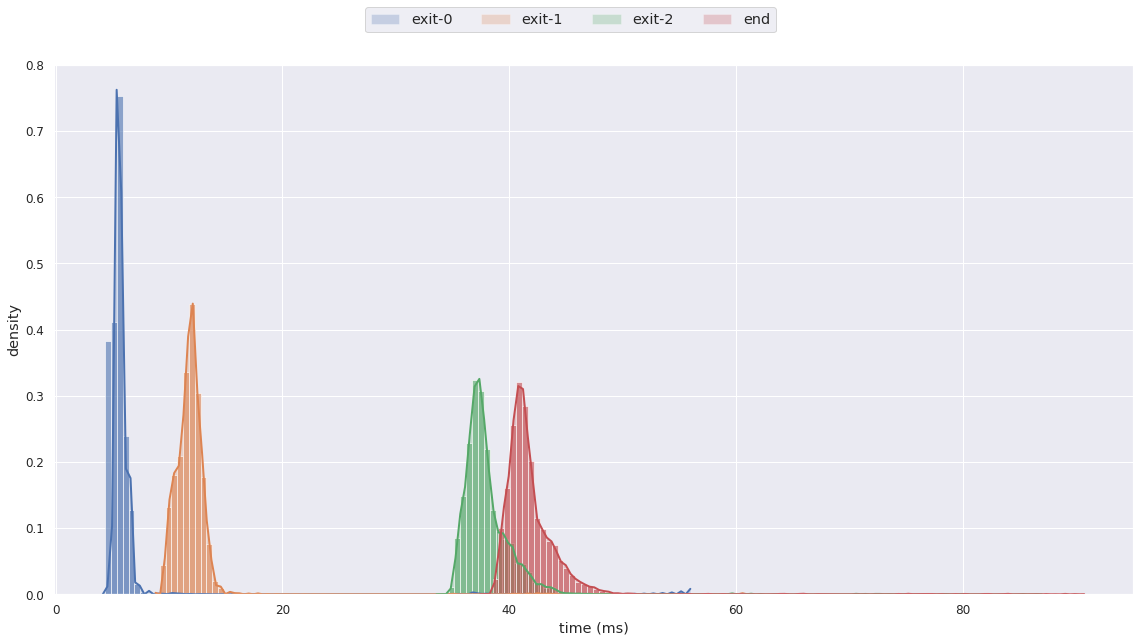

In [11]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2, 'shade': True}, hist=True, kde=True, bins=100)
fig, axes = plt.subplots(1,1, sharex=True, sharey=True)
for exit in range(0,4):
    sns.distplot(th_time[exit][0][35:180001], ax=axes, **kwargs)

    #sns.distplot(sm_time[exit][0][35:180001], ax=axes[1], **kwargs)
fig.legend(['exit-0', 'exit-1', 'exit-2', 'end'], loc='upper center', #bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=False, ncol=4, fontsize='large')
plt.xlabel('time (ms)')
plt.ylabel('density')
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('timing_resnet101.png')

In [79]:
exit_0_time = np.mean(th_time[0][0][35:18001].values)
exit_1_time = np.mean(th_time[1][0][35:18001].values)
exit_2_time = np.mean(th_time[2][0][35:18001].values)
exit_3_time = np.mean(th_time[3][0][35:18001].values)
print(exit_0_time)
print(exit_1_time-exit_0_time)
print(exit_2_time-exit_1_time)
print(exit_3_time-exit_2_time)
print()
print(exit_0_time)
print(exit_1_time)
print(exit_2_time)
print(exit_3_time)

5.762537860404977
6.487243387509904
26.053226294109905
3.777658577310568

5.762537860404977
12.24978124791488
38.30300754202479
42.080666119335355


In [52]:
print(len(df_sm.loc[(df_sm['exit'] == 1) & (df_sm['correct'] == True) & (df_sm['exited'] == 1)]))
print(len(df_sm.loc[(df_sm['exit'] == 1) & (df_sm['correct'] == False) & (df_sm['exited'] == 1)]))

23111
2994


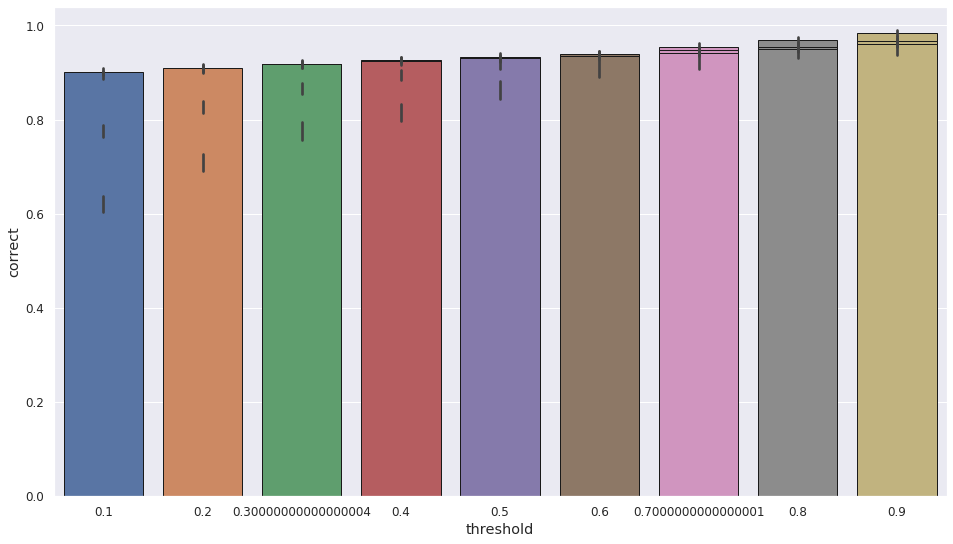

In [53]:
plt.figure(figsize=(16,9))
c = ["blue", "purple", "red", "green", "pink", ]
only_exited = df_sm.loc[(df_sm['exited'] == 1)]
for i, g in enumerate(only_exited.groupby("exit")):
    ax = sns.barplot(data=g[1],
                     x="threshold",
                     y="correct",
                     #hue="exit",
                     #color=c[i],
                     #zorder=-i, # so first bars stay on top
                     edgecolor="k")

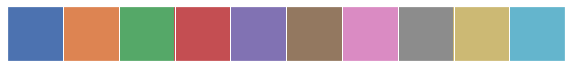

In [12]:
np.array(sm_exit_hist_correct)
current_palette = sns.color_palette()
sns.palplot(current_palette)

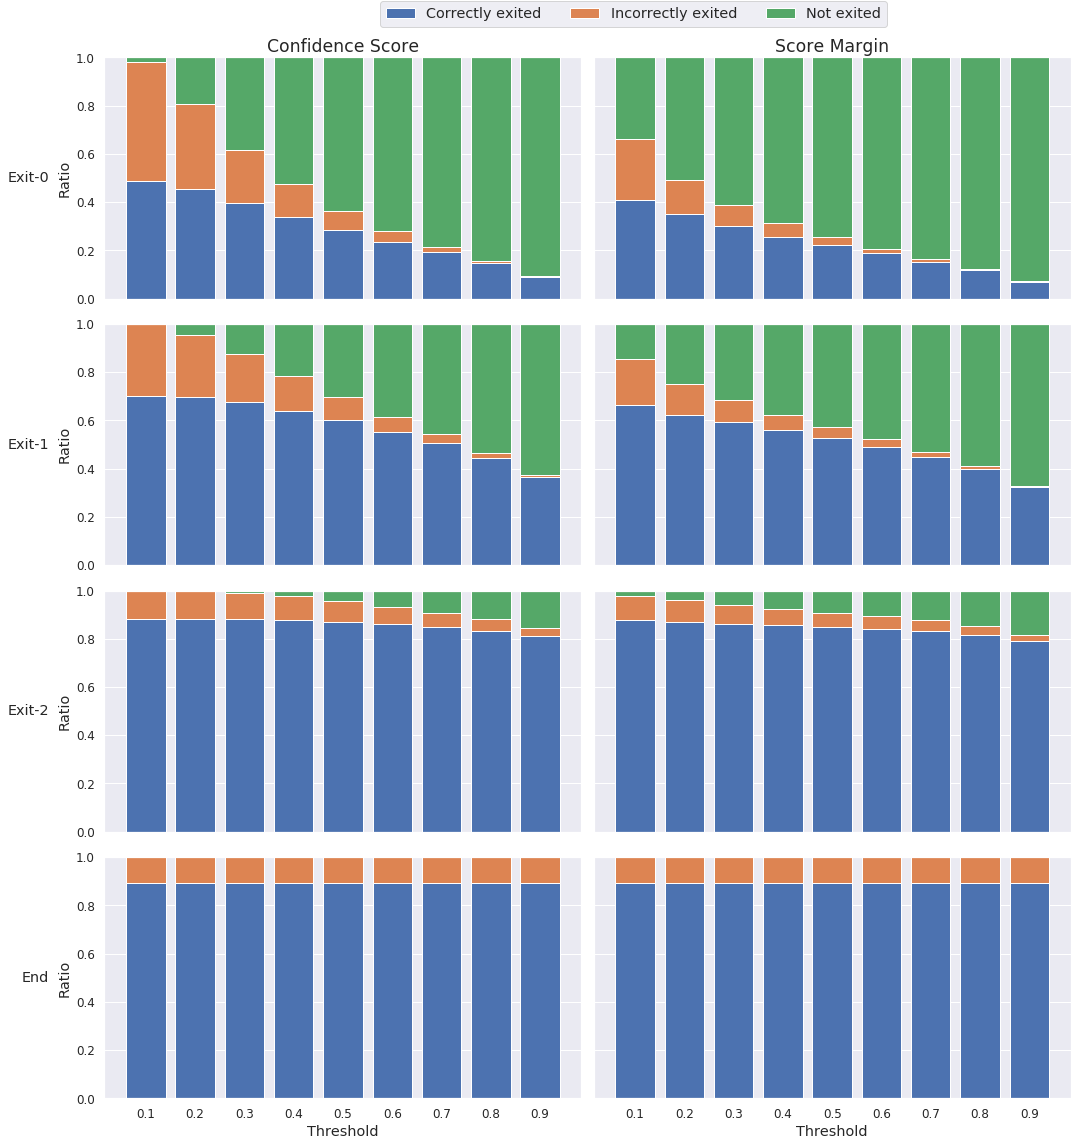

In [15]:
N = np.arange(9)
fig, ax = plt.subplots(4,2, figsize=(16,16), sharex=True, sharey=True)

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(th_exit_hist_correct)
incorrect = np.array(th_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_th.loc[(df_th['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==True) & (df_th['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_th.loc[(df_th['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==False) & (df_th['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 5000
incorrect = incorrect / 5000

not_exited = 1 - correct - incorrect

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].bar(N, not_exited[0], bottom=correct[0] + incorrect[0])
ax[0,0].set_title('Confidence Score')

ax[1,0].bar(N, correct[1])
ax[1,0].bar(N, incorrect[1], bottom=correct[1])
ax[1,0].bar(N, not_exited[1], bottom=correct[1] + incorrect[1])
#ax[1,0].set_title('Exit-1')

ax[2,0].bar(N, correct[2])
ax[2,0].bar(N, incorrect[2], bottom=correct[2])
ax[2,0].bar(N, not_exited[2], bottom=correct[2] + incorrect[2])
#ax[2,0].set_title('Exit-2')

ax[3,0].bar(N, correct[3])
ax[3,0].bar(N, incorrect[3], bottom=correct[3])
ax[3,0].bar(N, not_exited[3], bottom=correct[3] + incorrect[3])
#ax[3,0].set_title('Exit-3')

correct = np.array(sm_exit_hist_correct)
incorrect = np.array(sm_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==True) & (df_sm['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==False) & (df_sm['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 5000
incorrect = incorrect / 5000

not_exited = 1- correct - incorrect

ax[0,1].bar(N, correct[0])
ax[0,1].bar(N, incorrect[0], bottom=correct[0])
ax[0,1].bar(N, not_exited[0], bottom=correct[0] + incorrect[0])
ax[0,1].set_title('Score Margin')

ax[1,1].bar(N, correct[1])
ax[1,1].bar(N, incorrect[1], bottom=correct[1])
ax[1,1].bar(N, not_exited[1], bottom=correct[1] + incorrect[1])
#ax[1,1].set_title('Exit-1')

ax[2,1].bar(N, correct[2])
ax[2,1].bar(N, incorrect[2], bottom=correct[2])
ax[2,1].bar(N, not_exited[2], bottom=correct[2] + incorrect[2])
#ax[2,1].set_title('Exit-2')

ax[3,1].bar(N, correct[3])
ax[3,1].bar(N, incorrect[3], bottom=correct[3])
ax[3,1].bar(N, not_exited[3], bottom=correct[3] + incorrect[3])
#ax[3,1].set_title('Exit-3')

rows = ['Exit-0', 'Exit-1', 'Exit-2', 'End']
for a, row in zip(ax[:,0], rows):
    a.annotate(row, xy=(0, 0.5), xytext=(-a.yaxis.labelpad - 5, 0),
                xycoords=a.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')
    
for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()

    # Put a legend below current axis
fig.legend(['Correctly exited', 'Incorrectly exited', 'Not exited'], loc='upper center', bbox_to_anchor=(0.55, 1),
          fancybox=True, shadow=False, ncol=3)



fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
plt.savefig('threshold_analysis_resnet101.png')

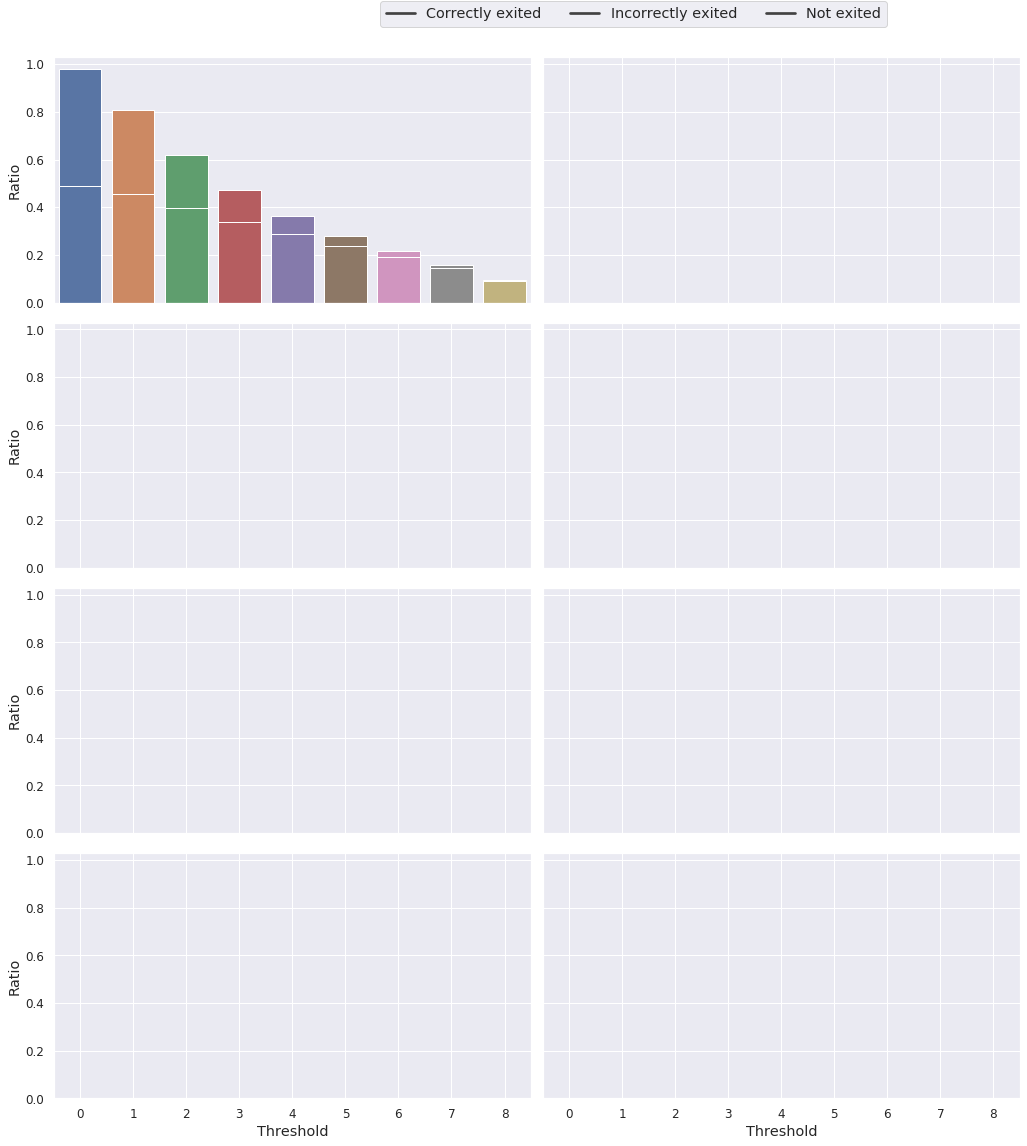

In [84]:
N = np.arange(9)
fig, ax = plt.subplots(4,2, figsize=(16,16), sharex=True, sharey=True)

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(th_exit_hist_correct)
incorrect = np.array(th_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_th.loc[(df_th['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==True) & (df_th['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_th.loc[(df_th['exit'] == 3) & (df_th['threshold']==i) & (df_th['correct']==False) & (df_th['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 5000
incorrect = incorrect / 5000

not_exited = 1 - correct - incorrect

sns.barplot(N, correct[0], ax=ax[0,0])
sns.barplot(N, incorrect[0], ax=ax[0,0], bottom=correct[0])

    
for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()


    # Put a legend below current axis
fig.legend(['Correctly exited', 'Incorrectly exited', 'Not exited'], loc='upper center', bbox_to_anchor=(0.55, 1),
          fancybox=True, shadow=False, ncol=3)

fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)
#plt.savefig('threshold_analysis_resnet101.png')

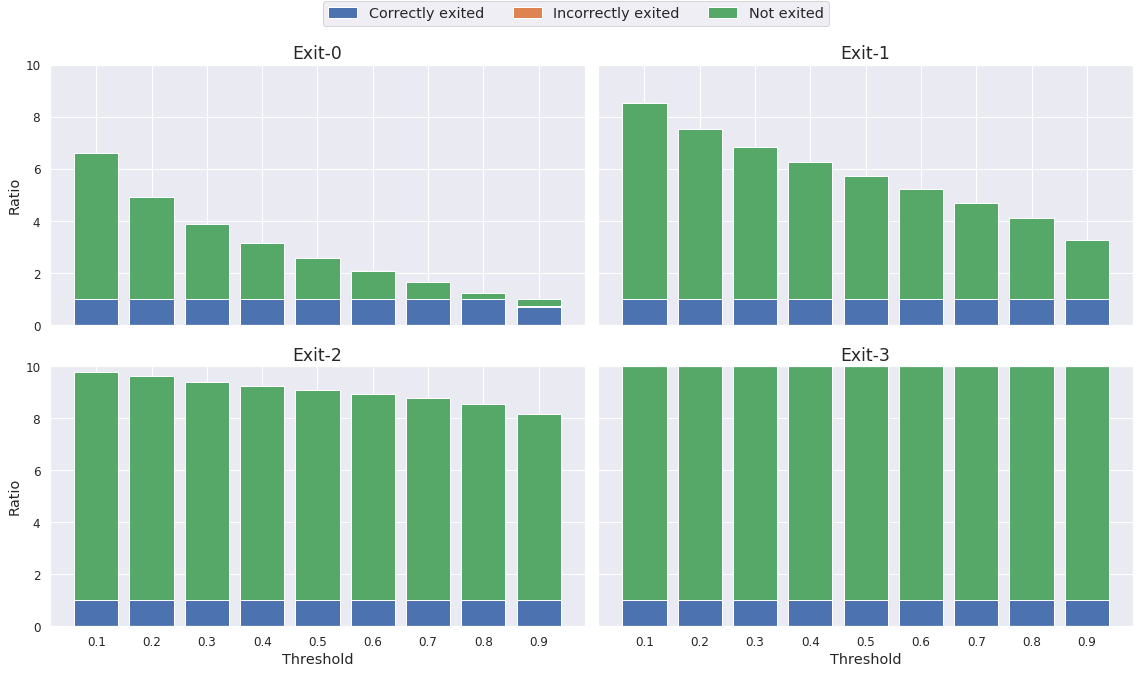

In [56]:
N = np.arange(9)
fig, ax = plt.subplots(2,2, figsize=(16,9), sharex=True, sharey=True)


plt.rcParams.update({'font.size': 12})

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(sm_exit_hist_correct)
incorrect = np.array(sm_exit_hist_false)



exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==True) & (df_sm['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==False) & (df_sm['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 500
incorrect = incorrect / 500

not_exited = 1- correct - incorrect

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].bar(N, not_exited[0], bottom=correct[0] + incorrect[0])
ax[0,0].set_title('Exit-0')

ax[0,1].bar(N, correct[1])
ax[0,1].bar(N, incorrect[1], bottom=correct[1])
ax[0,1].bar(N, not_exited[1], bottom=correct[1] + incorrect[1])
ax[0,1].set_title('Exit-1')

ax[1,0].bar(N, correct[2])
ax[1,0].bar(N, incorrect[2], bottom=correct[2])
ax[1,0].bar(N, not_exited[2], bottom=correct[2] + incorrect[2])
ax[1,0].set_title('Exit-2')

ax[1,1].bar(N, correct[3])
ax[1,1].bar(N, incorrect[3], bottom=correct[3])
ax[1,1].bar(N, not_exited[3], bottom=correct[3] + incorrect[3])
ax[1,1].set_title('Exit-3')

#ax[0,0].legend(['Correct', 'Incorrect', 'Not exited'])

for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()

    # Put a legend below current axis
fig.legend(['Correctly exited', 'Incorrectly exited', 'Not exited'], loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=False, ncol=3)

fig.tight_layout()

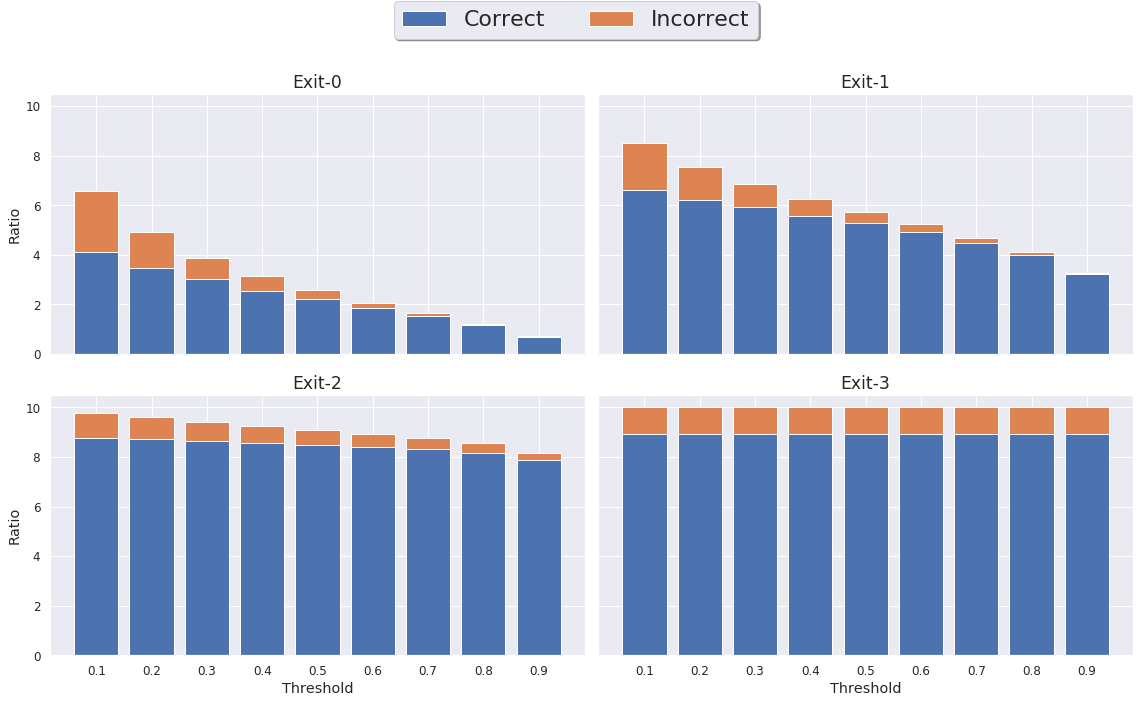

In [57]:
N = np.arange(9)
fig, ax = plt.subplots(2,2, figsize=(16,9), sharex=True, sharey=True)

plt.setp(ax, xticks=N, xticklabels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

correct = np.array(sm_exit_hist_correct)
incorrect = np.array(sm_exit_hist_false)

exit3_fix_correct = []
exit3_fix_incorrect = []
for i in np.arange(0.1,1,0.1):
    exit3_fix_correct.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==True) & (df_sm['exited'] == False)]))
    exit3_fix_incorrect.append(len(df_sm.loc[(df_sm['exit'] == 3) & (df_sm['threshold']==i) & (df_sm['correct']==False) & (df_sm['exited'] == False)]))


correct[3] += exit3_fix_correct
incorrect[3] += exit3_fix_incorrect

correct = correct / 500
incorrect = incorrect / 500

ax[0,0].bar(N, correct[0])
ax[0,0].bar(N, incorrect[0], bottom=correct[0])
ax[0,0].set_title('Exit-0')

ax[0,1].bar(N, correct[1])
ax[0,1].bar(N, incorrect[1], bottom=correct[1])
ax[0,1].set_title('Exit-1')

ax[1,0].bar(N, correct[2])
ax[1,0].bar(N, incorrect[2], bottom=correct[2])
ax[1,0].set_title('Exit-2')

ax[1,1].bar(N, correct[3])
ax[1,1].bar(N, incorrect[3], bottom=correct[3])
ax[1,1].set_title('Exit-3')

    # Put a legend below current axis
fig.legend(['Correct', 'Incorrect'], loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=3, fontsize=22)

for a in ax.flat:
    a.set(xlabel='Threshold', ylabel='Ratio')
    a.label_outer()


fig.tight_layout()

In [58]:

sm_exit_hist_correct

[[2049, 1745, 1506, 1281, 1109, 935, 767, 583, 353],
 [3312, 3112, 2969, 2792, 2633, 2453, 2234, 1995, 1611],
 [4380, 4355, 4312, 4279, 4237, 4198, 4151, 4081, 3947],
 [4442, 4420, 4397, 4374, 4345, 4316, 4280, 4222, 4131]]

In [59]:
df_sm.loc[(df_sm['exit']==3) & (df_sm['exited']==False) &  (df_sm['correct']==True)]

,threshold,test,exit,sample,exited,prediction,target,correct,score,time
1867,0.8,7,3,51,0,1,1,True,7.131129e-07,40.6337
1871,0.9,8,3,51,0,1,1,True,7.131129e-07,40.6337
2587,0.8,7,3,71,0,1,1,True,3.210793e-08,42.4215
2591,0.9,8,3,71,0,1,1,True,3.210793e-08,42.4215
3715,0.2,1,3,103,0,2,2,True,2.553461e-06,43.5545
3719,0.3,2,3,103,0,2,2,True,2.553461e-06,43.5545
3723,0.4,3,3,103,0,2,2,True,2.553461e-06,43.5545
3727,0.5,4,3,103,0,2,2,True,2.553461e-06,43.5545
3731,0.6,5,3,103,0,2,2,True,2.553461e-06,43.5545
3735,0.7,6,3,103,0,2,2,True,2.553461e-06,43.5545
